# Model Evaluation

## Regression vs. Classification

Two very simple datasets are plotted below.
Say you have to predict `y` from `x` in each of them.

1. One of the datasets defines a classification problem and the other one defines a regression problem. Which is which?
2. Explain your answer!

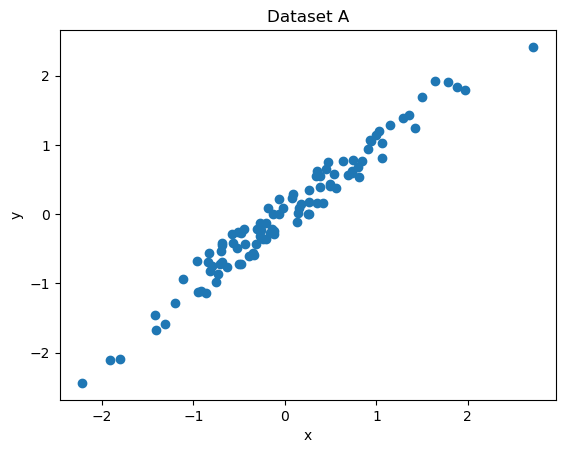

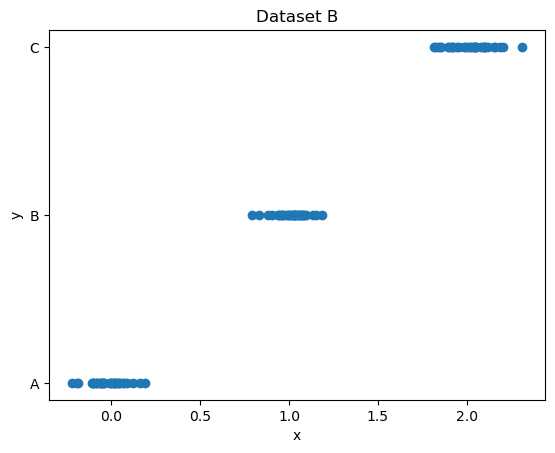

In [35]:
import numpy as np
import matplotlib.pyplot as plt

dataset_a = np.random.normal(0.0, 1.0, 100)

plt.scatter(dataset_a, dataset_a + np.random.uniform(-0.3, 0.3, 100))
plt.xlabel("x")
plt.ylabel("y")
plt.title("Dataset A")
plt.show()

dataset_b = np.concat([np.random.normal(i, 0.1, 33) for i in range(3)])

plt.scatter(dataset_b, np.concat([[value]*33 for value in ["A", "B", "C"]]))
plt.title("Dataset B")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Regression

#### MAE vs MSE

Let $y_i$ be the actual value and $\hat{y}_i$ be the predicted value, then: $MAE = \frac{1}{n} \sum_i |y_i - \hat{y}_i|$ and $MSE = \frac{1}{n} \sum_i (y_i - \hat{y}_i)^2$.

The MAE and MSE are applied on the example data below to evaluate a mean predictor model.

1. What pros/cons do you see in this example for the MAE and the MSE respectively?
2. When would you generally use MAE and when would you use MSE?

mean = 1.8
Mean Predictor MAE = 1.4400
Mean Predictor MSE = 5.7600


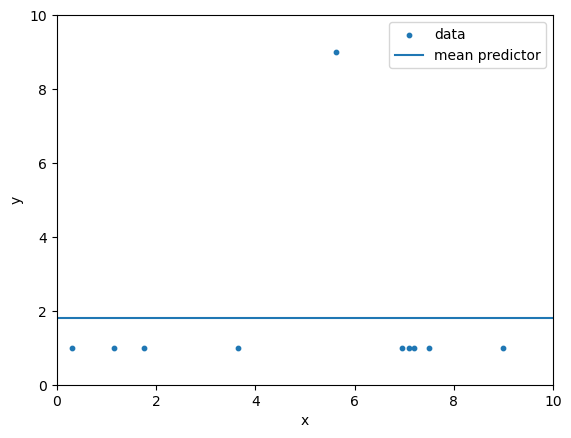

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_vs_mse_X = np.random.uniform(0, 10, 10)
mae_vs_mse_dataset = np.array([[x, 1] for x in mae_vs_mse_X])
mae_vs_mse_dataset[-1, 1] = 9

mean_predictor = np.mean(mae_vs_mse_dataset[:, 1])

print("mean =", mean_predictor)

mae = mean_absolute_error(mae_vs_mse_dataset[:, 1], [mean_predictor]*10)
mse = mean_squared_error(mae_vs_mse_dataset[:, 1], [mean_predictor]*10)

print(f"Mean Predictor MAE = {mae:.4f}")
print(f"Mean Predictor MSE = {mse:.4f}")

plt.scatter(mae_vs_mse_dataset[:, 0], mae_vs_mse_dataset[:, 1], s=10)
plt.axhline(mean_predictor)

plt.xlim([0, 10])
plt.ylim([0, 10])

plt.xlabel("x")
plt.ylabel("y")
plt.legend(["data", "mean predictor"])

plt.show()

#### $R^2$

Let $y_i$ be the actual value, $\hat{y}_i$ the predicted value and $\bar{y} = \frac{1}{n} \sum_i y_i$ the mean of all actual values. Then,
$R^2 = 1 - \frac{\sum_i (y_i - \hat{y}_i)^2}{\sum_j (y_j - \bar{y})^2}$.

1. Look at the formula and try to understand what the $R^2$ measure intuitively measures. **Hint:** Consider the case were we only predict the mean $\bar{y}$. Below you can find the $R^2$ measure for the preceding example.

In [37]:
from sklearn.metrics import r2_score

r2 = r2_score(mae_vs_mse_dataset[:, 1], [mean_predictor]*10)
print(f"Mean Predictor R^2 = {r2:.4f}")

Mean Predictor R^2 = 0.0000


### Classification

#### Prediction outcomes

For a binary classification problem, what are the four possible prediction outcomes? List their names and briefly explain what they represent.

#### Properties of precision and recall
What unwanted strategies could a classifier predicting the class `0` or `1` employ to

1) always get a *precision* of `1`
1) always get a *recall* of `1`

#### Choosing between precision and recall
In what settings is precision more important than recall and in which applications is recall more important than precision? **Hint:** As an example, think of a spam filter which has to differentiate between spam and important mails from your boss.

#### Combine precision and recall
* What is a measure that combines precision and recall? 
* Define it.
* Why do we use the harmonic rather than the arithmetic mean?

#### Reference values

Consider the following label set:

* `y`: roughly the same amount of cases (`1`) and controls (`0`)

Now, calculate the *accuracy*, *precision*, *recall*, and *ROC AUC*.

1) For a classifier that returns random labels. What do you observe?
2) For a classifier that always returns `1`. What do you observe?

**Hints:**
* Wikipedia has a nice diagram at the top of its ["Precision and recall"](https://en.wikipedia.org/wiki/Precision_and_recall) page, which can help to think about such questions.
* You can simulate these classifiers without input data, i.e., by generating their predictions manually.
* You can use `numpy` and `scikit-learn` to show these cases instead of answering theoretically.

In [38]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

np.random.seed(42)
n = 1000

# labels 1 (random)
y = np.random.choice([0,1], p=(0.5, 0.5), size=n)

# predictions of different classifiers
y_pred_random = np.random.choice([0,1], p=(0.5, 0.5), size=n)
y_pred_1 = np.repeat(1, y.size)

#### Imbalanced data

Consider the following label set:

* `y_imbalanced`:  only a small set of cases (`1`) compared to controls (`0`)

Now, calculate the *accuracy*, *precision*, *recall*, and *ROC AUC*.

1) For a classifier that returns random labels. What do you observe?
2) For a classifier that always predicts the majority class (`0`). What do you observe and why could this be an issue in practice (particularly if we only consider `accuracy`)?

**Hints:**
* You can simulate these classifiers without input data, i.e., by generating their predictions manually.
* You can use `numpy` and `scikit-learn` to show these cases instead of answering theoretically.

In [41]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

np.random.seed(42)
n = 1000

# labels 2 (imbalanced, i.e., small sets of `cases` (label=1))
y_imbalance = np.random.choice([0,1], p=(0.9, 0.1), size=n)

# predictions of different classifiers
y_pred_random = np.random.choice([0,1], p=(0.5, 0.5), size=n)
y_pred_majority = np.repeat(0, y.size)

## Train / Test

The following code uses `train_test_split` to shuffle and split the given data `(X, y)` into a train and a test dataset with a 80:20 ratio.
It then trains the `DecisionTreeClassifier` on the training dataset and evaluates it using the ROC AUC score for the training and the test dataset.

1. What do you observe?
2. What could be an issue with publications where no test set is used?
3. What could go wrong if we keep on improving our model until it performs well on our **fixed** test set?

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

np.random.seed(42)

n_samples = 1000
n_features = 100
X = np.random.random((n_samples, n_features))
y = np.random.choice([0, 1], p=(0.5, 0.5), size=n_samples)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_train)
print(f"Train ROC AUC = {roc_auc_score(y_train, y_pred[:,1])}")

y_pred = model.predict_proba(X_test)
print(f"Test ROC AUC = {roc_auc_score(y_test, y_pred[:,1])}")

Train ROC AUC = 1.0
Test ROC AUC = 0.49240558292282427


## Cross Validation

Consider the following dataset `(X, y)`. We already split it into a train `(X_train, y_train)`, `(X_val, y_val)`, and a test set `(X_test, y_test)`.

1. Why would we split the dataset into 3 parts like here, instead of just train-test?
2. The ROC AUC score is computed on the train, validation, and test dataset. What do you observe?
3. How does the application of cross validation improve the evaluation compared to just evaluating the model on a fixed evaluation set?
4. Cross validation is computed here and the mean and standard deviation of the ROC AUC scores are reported. What does this tell you?
5. In addition to the ROC AUC score on the test set, why would you also always report the mean and standard deviation of the cross validations scores?
6. Why would you be a bit suspicious of the current ROC AUC score on the test set?
7. BONUS: Why are we observing these results based on the data we use? 
8. Suppose the dataset contains medical data of patients and the same patient was examined multiple times, leading to multiple data instances. Why would the current implementation of cross validation be considered cheating and how should it be changed in order to avoid cheating?

In [73]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

np.random.seed(42)

n_samples = 200 * 6
X, y = make_classification(n_samples=n_samples, flip_y=0.01, n_redundant=2, n_informative=2)
X[-2*int(n_samples / 6):-int(n_samples / 6),:] = np.random.random((int(n_samples / 6), X.shape[1]))

# define the test set
X_intermediate, X_test, y_intermediate, y_test = train_test_split(X, y, test_size=1/6, shuffle=False)

# use the remaining data to define the train and validation set
X_train, X_val, y_train, y_val = train_test_split(X_intermediate, y_intermediate, test_size=0.2, shuffle=False)

# X_train, y_train
# X_val, y_val
# X_test, y_test

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_train)
print(f"Train ROC AUC = {roc_auc_score(y_train, y_pred[:,1])}")

y_pred = model.predict_proba(X_val)
print(f"Validation ROC AUC = {roc_auc_score(y_val, y_pred[:,1])}")

y_pred = model.predict_proba(X_test)
print(f"Test ROC AUC = {roc_auc_score(y_test, y_pred[:,1])}")

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_intermediate, y_intermediate, scoring="roc_auc")
print("CV ROC AUC mean:", np.mean(scores))
print("CV ROC AUC std:", np.std(scores))

Train ROC AUC = 1.0
Validation ROC AUC = 0.48036858974358976
Test ROC AUC = 0.9349999999999999
CV ROC AUC mean: 0.8560000000000001
CV ROC AUC std: 0.16454178800535743
